# In-Class Exercise on Spam Filtering  
In this exercise, we will use powerful tools such as pandas and sklearn to distinguish between spam and regular emails based on the information contained in the emails themselves.


## Download Data  
The data is downloaded using gdown into the same folder as the current file. After downloading, we unzip the received data.

In [1]:
import pandas as pd

In [ ]:
#### YOUR CODE HERE ####
!gdown https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal
#### END YOUR CODE #####

Downloading...
From: https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal
To: d:\DHBK\251\NLP\Lab\Week4\in-class\archive.zip

  0%|          | 0.00/1.95M [00:00<?, ?B/s]
 27%|██▋       | 524k/1.95M [00:00<00:00, 3.07MB/s]
 80%|████████  | 1.57M/1.95M [00:00<00:00, 4.56MB/s]
100%|██████████| 1.95M/1.95M [00:00<00:00, 5.36MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Using Pandas for Storage  
Pandas is a commonly used library for storing data utilized in machine learning processes, offering functions suitable for large datasets and high performance. We read the data from the unzipped file into a `DataFrame`.


In [2]:
#### YOUR CODE HERE ####
data = pd.read_csv("./archive/spam_ham_dataset.csv")
#### END YOUR CODE #####

Visualizing Data with 5 Examples 

In [3]:
#### YOUR CODE HERE ####
print(data.columns)
print(data.head(5))
#### END YOUR CODE #####

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


## Data Preprocessing  
As we can see, the current data contains Windows newline characters `\r\n`, which may cause confusion. To simplify, we replace them with spaces. You can also apply additional Pandas methods (e.g., removing the "Subject:" prefix, extracting the first line, etc.).


In [4]:
#### YOUR CODE HERE ####
data['text'] = (
    data['text']
    .str.replace(r'\r\n', ' ', regex=True)    
    .str.replace(r'^Subject:\s*', '', regex=True)  
    .str.strip()                              
)
#### END YOUR CODE #####

## Building Model  
First, we perform vectorization of the input data using `CountVectorizer`, aiming to convert text data into numerical representations. `CountVectorizer` creates a vocabulary of words appearing in the dataset and generates a corresponding vector for each sample, representing the word frequencies within that sample.


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
#### YOUR CODE HERE ####
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['text'])
print("Shape of X:", X.shape)
print("Sample vocabulary:", vectorizer.get_feature_names_out()[:10])

#### END YOUR CODE #####

Shape of X: (5171, 50447)
Sample vocabulary: ['00' '000' '0000' '000000' '000000000002858' '000000000049773' '000080'
 '000099' '0001' '00018']


Next, we apply the TF-IDF algorithm to the obtained vector. The output remains a sparse matrix but is now adjusted for the rarity of each word.


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
#### YOUR CODE HERE ####
tfidf_transformer = TfidfTransformer()

X_tfidf = tfidf_transformer.fit_transform(X)
print("Shape of TF-IDF matrix:", X_tfidf.shape)

#### END YOUR CODE #####

Shape of TF-IDF matrix: (5171, 50447)


We can generate n-gram data using the `ngram_range` argument in `CountVectorizer`, allowing the program to capture commonly occurring n-word phrases in the dataset.  

Additionally, `CountVectorizer` and `TfidfTransformer` have a combined wrapper that integrates both processes into one while accepting their shared arguments: `TfidfVectorizer`.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
#### YOUR CODE HERE ####
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf_vec = vectorizer.fit_transform(data['text'])

print("Shape of TF-IDF (with n-grams):", X_tfidf_vec.shape)
print("Sample vocabulary:", vectorizer.get_feature_names_out()[:10])

#### END YOUR CODE #####

Shape of TF-IDF (with n-grams): (5171, 312583)
Sample vocabulary: ['00' '00 00' '00 000' '00 01' '00 02' '00 03' '00 05' '00 0600' '00 076'
 '00 08']


After completing the vectorization steps, we proceed to split the data into training and testing sets to evaluate the model's performance.








In [8]:
from sklearn.model_selection import train_test_split
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                 # TF-IDF (or CountVectorizer)
    data['label'],          
    test_size=0.3,           # 30% test
    random_state=42         
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)
#### END YOUR CODE #####

Train size: (3619, 50447) Test size: (1552, 50447)


Once we have the vectorized data, we use a Bayesian model to compute the results, such as `GaussianNB`. Other machine learning models can also be applied here (e.g., `LogisticRegression`, `SVM`).  

**Note:** The `todense()` function is used to convert a sparse matrix to a dense matrix, which may cause `MemoryError` for large datasets. Consider using models that support training with sparse matrices or implementing your own solution here.


In [10]:
from sklearn.naive_bayes import GaussianNB
#### YOUR CODE HERE ####
X_train_dense = X_train.toarray()   
X_test_dense  = X_test.toarray()

model = GaussianNB()
model.fit(X_train_dense, y_train)

y_pred = model.predict(X_test_dense)

#### END YOUR CODE #####

## Metrics and Visualization  
To evaluate the model's performance, we can compute the F1 score or accuracy. In this case, we use the F1 score since the class distribution in the dataset is imbalanced (with 25% spam).  

Additionally, we can plot the ROC-AUC curve to visualize different cutoff points for the model.


Accuracy : 0.9523195876288659
F1-score : 0.9135514018691588

Classification report:
               precision    recall  f1-score   support

         ham       0.96      0.97      0.97      1121
        spam       0.92      0.91      0.91       431

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552



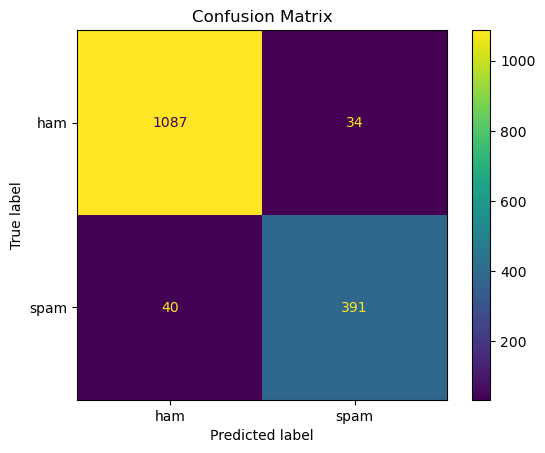

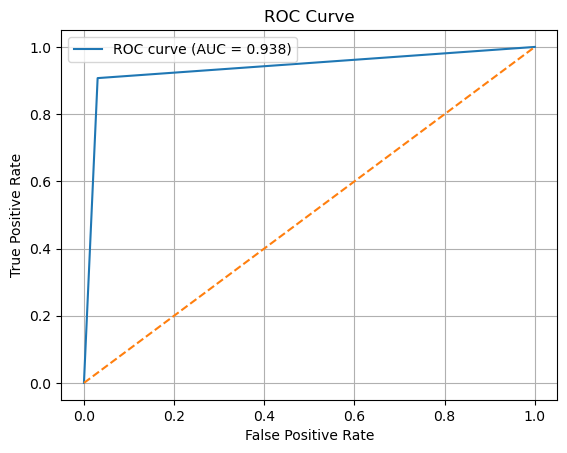

In [ ]:
#### YOUR CODE HERE ####
from sklearn.metrics import (
    f1_score, accuracy_score, classification_report,
    ConfusionMatrixDisplay, roc_curve, roc_auc_score
)
import numpy as np
import matplotlib.pyplot as plt

X_eval = X_test_dense if 'X_test_dense' in locals() else X_test

y_pred = model.predict(X_eval)

pos_label = 1 if set(np.unique(y_test)) <= {0, 1} else 'spam'

# Metrics chính
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred, pos_label=pos_label))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion Matrix (visual)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ROC–AUC (score/prob)
y_score = None
if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_eval)[:, 1]
elif hasattr(model, "decision_function"):
    y_score = model.decision_function(X_eval)

if y_score is not None:
    y_true_bin = (np.array(y_test) == pos_label).astype(int)

    auc_val = roc_auc_score(y_true_bin, y_score)
    fpr, tpr, _ = roc_curve(y_true_bin, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_val:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

#### END YOUR CODE #####

## Alternative: Co-occurrence and TruncatedSVD  

In language, semantically related words (e.g., *doctor* and *patient*) often appear in the same context. Based on this idea, we can construct a co-occurrence matrix that captures word occurrences within sentences. This allows us to represent words in a shared vector space rather than relying on simple frequency counts.  

A co-occurrence matrix with a window spanning the entire sentence can be built using the existing `CountVectorizer` data or manually constructed.


In [12]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import numpy as np
import scipy.sparse as sp


vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',     
    max_features=30000,    
    min_df=2,             
    binary=True
)
docs = data['text'].astype(str).tolist()
X = vectorizer.fit_transform(docs)   


C = X.T @ X                         
C.setdiag(0)
C.eliminate_zeros()

print("Term-Document shape:", X.shape)
print("Co-occurrence shape:", C.shape)

#    n_components: số chiều ẩn, chọn 100–300 tùy dữ liệu/kích thước
svd = TruncatedSVD(n_components=200, random_state=42)
word_emb = svd.fit_transform(C)     # ndarray (n_terms, k)
word_emb = normalize(word_emb)

vocab = vectorizer.get_feature_names_out()

def most_similar(token, topk=10):
    if token not in vocab:
        return []
    idx = np.where(vocab == token)[0][0]
    v = word_emb[idx]
    sims = word_emb @ v
    # loại chính nó
    sims[idx] = -1.0
    top_idx = np.argpartition(-sims, range(topk))[:topk]
    top_idx = top_idx[np.argsort(-sims[top_idx])]
    return [(vocab[i], float(sims[i])) for i in top_idx]

print(most_similar("doctor", topk=10))  
#### END YOUR CODE #####

Term-Document shape: (5171, 21892)
Co-occurrence shape: (21892, 21892)
[('pharmacy', 0.8649931513341517), ('doctors', 0.8586132433363366), ('medications', 0.8548437225396075), ('cholesterol', 0.8545166066451045), ('door', 0.8514442023023848), ('sleep', 0.8470321612770014), ('erection', 0.8416108732380833), ('suffer', 0.8408908020997456), ('dysfunction', 0.8337578223221964), ('medication', 0.83065239379182)]


## Alternative: HashingVectorizer  

For large datasets with a high vocabulary size, using `CountVectorizer` for vectorized data storage can be resource-intensive. An alternative approach is to use `HashingVectorizer`. Unlike `CountVectorizer`, which assigns a unique ID to each word/ngram, `HashingVectorizer` maps multiple words to the same ID using a hashing function.  

The choice between these two methods involves a trade-off between memory usage (e.g., RAM) and model quality. Adjusting the `n_features` parameter helps balance this trade-off to ensure that model performance does not degrade significantly.


In [ ]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer

# --- CountVectorizer ---
count_vec = CountVectorizer(max_features=5000) 
X_count = count_vec.fit_transform(data['text'].astype(str))

print("CountVectorizer:")
print("  Shape:", X_count.shape)
print("  Sample vocab:", list(count_vec.get_feature_names_out()[:10]))


# --- HashingVectorizer ---
# n_features = số chiều vector sau khi băm
hash_vec = HashingVectorizer(n_features=5000, alternate_sign=False)  
X_hash = hash_vec.fit_transform(data['text'].astype(str))

print("\nHashingVectorizer:")
print("  Shape:", X_hash.shape)
sample_text = ["this is a simple test document"]
print("HashingVectorizer vector:", hash_vec.transform(sample_text).toarray())

#### END YOUR CODE #####

CountVectorizer:
  Shape: (5171, 5000)
  Sample vocab: ['00', '000', '0000', '000000', '000080', '001', '002', '005', '01', '012']

HashingVectorizer:
  Shape: (5171, 5000)
HashingVectorizer vector: [[0. 0. 0. ... 0. 0. 0.]]


## Comparison and Analysis of Feature Extraction Methods  